In [2]:
import numpy as np
import  pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from pandas_datareader import data as pdr
yf.pdr_override()
import cufflinks as cf
cf.set_config_file(offline=True)
import warnings
warnings.filterwarnings("ignore")



In [3]:
df1 = pdr.get_data_yahoo('AAPL' ,'2011-01-01','2021-12-31')
df1 = df1[['Open', 'Close']]
df1 = df1.rename(columns = {'Open':'Open_AAPL', 'Close': 'Close_AAPL'})
df2 = pdr.get_data_yahoo('MSFT' ,'2011-01-01','2021-12-31')
df2 = df2[['Open', 'Close']]
df2 = df2.rename(columns = {'Open':'Open_MSFT', 'Close': 'Close_MSFT'})
df3 = pdr.get_data_yahoo('AMZN' ,'2011-01-01','2021-12-31')
df3 = df3[['Open', 'Close']]
df3 = df3.rename(columns = {'Open':'Open_AMZN', 'Close': 'Close_AMZN'})
df4 = pdr.get_data_yahoo('AMAT' ,'2011-01-01','2021-12-31')
df4 = df4[['Open', 'Close']]
df4 = df4.rename(columns = {'Open':'Open_AMAT', 'Close': 'Close_AMAT'})
df5 = pdr.get_data_yahoo('TSLA' ,'2011-01-01','2021-12-31')
df5 = df5[['Open', 'Close']]
df5 = df5.rename(columns = {'Open':'Open_TSLA', 'Close': 'Close_TSLA'})
df = df1.merge(df2.merge(df3, on='Date'), on='Date')
dff = df.merge(df4.merge(df5, on='Date'), on='Date')
dff

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_AMZN,Close_AMZN,Open_AMAT,Close_AMAT,Open_TSLA,Close_TSLA
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,181.960007,180.000000,14.130000,14.050000,5.314000,5.326000
2011-01-03,11.630000,11.770357,28.049999,27.980000,181.369995,184.220001,14.130000,14.060000,5.368000,5.324000
2011-01-04,11.872857,11.831786,27.940001,28.090000,186.149994,185.009995,14.060000,13.970000,5.332000,5.334000
2011-01-05,11.769643,11.928571,27.900000,28.000000,184.100006,187.419998,13.820000,13.760000,5.296000,5.366000
2011-01-06,11.954286,11.918929,28.040001,28.820000,186.500000,185.860001,13.820000,13.890000,5.366000,5.576000
2011-01-07,11.928214,12.004286,28.639999,28.600000,187.880005,185.490005,13.930000,13.960000,5.600000,5.648000
2011-01-10,12.101071,12.230357,28.260000,28.219999,185.039993,184.679993,13.890000,13.770000,5.634000,5.690000
2011-01-11,12.317143,12.201429,28.200001,28.110001,185.419998,184.339996,13.870000,14.080000,5.718000,5.392000
2011-01-12,12.258929,12.300714,28.120001,28.549999,185.360001,184.080002,14.170000,14.260000,5.402000,5.392000


In [4]:
three_years = dff.loc['2011-01-01':'2013-12-31']
three_years = three_years[['Close_AAPL','Close_MSFT','Close_AMZN','Close_AMAT','Close_TSLA']]
three_years['Return_AAPL'] = three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT'] = three_years['Close_MSFT'].pct_change()
three_years['Return_AMZN'] = three_years['Close_AMZN'].pct_change()
three_years['Return_AMAT'] = three_years['Close_AMAT'].pct_change()
three_years['Return_TSLA'] = three_years['Close_TSLA'].pct_change()
three_years = three_years[['Return_AAPL','Return_MSFT','Return_AMZN','Return_AMAT','Return_TSLA']]
three_years = three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_AMZN,Return_AMAT,Return_TSLA
Date,,,,,
2011-01-04,0.005219,0.003931,0.004288,-0.006401,0.001878
2011-01-05,0.008180,-0.003204,0.013026,-0.015032,0.005999
2011-01-06,-0.000808,0.029286,-0.008324,0.009448,0.039135
2011-01-07,0.007161,-0.007634,-0.001991,0.005040,0.012912
2011-01-10,0.018833,-0.013287,-0.004367,-0.013610,0.007436
2011-01-11,-0.002365,-0.003898,-0.001841,0.022513,-0.052373
2011-01-12,0.008137,0.015653,-0.001410,0.012784,0.000000
2011-01-13,0.003658,-0.012609,0.007877,-0.001403,-0.027448
2011-01-14,0.008100,0.003902,0.017356,0.075843,-0.017925


In [5]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T

no_of_asset_classes = 5
no_of_portfolios = 10000
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[2])
    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index])

[[0.22355367 0.09708582 0.32297359 0.00129565 0.35509127]]


In [6]:
some_weights = pd.DataFrame({"AAPL": [0.20], "MSFT": [0.20], "AMZN": [0.20], "AMAT": [0.20], "TSLA": [0.20]}, index = [three_years.last_valid_index()])
some_weights

,AAPL,MSFT,AMZN,AMAT,TSLA
2013-12-31,0.2,0.2,0.2,0.2,0.2


In [7]:
capital = 10000
allocations = capital*some_weights
allocations

,AAPL,MSFT,AMZN,AMAT,TSLA
2013-12-31,2000.0,2000.0,2000.0,2000.0,2000.0


In [8]:
no_of_shares = allocations
no_of_shares['AAPL'].iloc[0] /= dff['Close_AAPL'].loc[some_weights.last_valid_index()]
no_of_shares['MSFT'].iloc[0] /= dff['Close_MSFT'].loc[some_weights.last_valid_index()]
no_of_shares['AMZN'].iloc[0] /= dff['Close_AMZN'].loc[some_weights.last_valid_index()]
no_of_shares['AMAT'].iloc[0] /= dff['Close_AMAT'].loc[some_weights.last_valid_index()]
no_of_shares['TSLA'].iloc[0] /= dff['Close_TSLA'].loc[some_weights.last_valid_index()]
no_of_shares

,AAPL,MSFT,AMZN,AMAT,TSLA
2013-12-31,99.818189,53.461641,5.015171,113.12217,66.476101


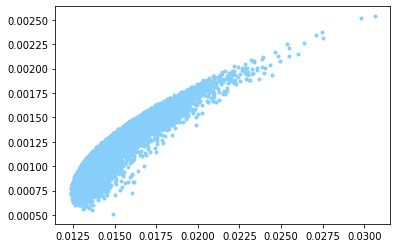

In [9]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.show()

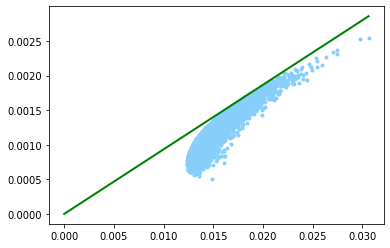

In [10]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

In [11]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

In [12]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.22355367 0.09708582 0.32297359 0.00129565 0.35509127]]
0.0932283181833098


In [13]:
my_porto = dff.loc['2013-12-31':]
my_porto['My_Fund_Open'] = my_porto['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + my_porto['Open_MSFT']*no_of_shares['MSFT'].iloc[0]+ my_porto['Open_AMZN']*no_of_shares['AMZN'].iloc[0]+ my_porto['Open_AMAT']*no_of_shares['AMAT'].iloc[0]+ my_porto['Open_TSLA']*no_of_shares['TSLA'].iloc[0]
my_porto['My_Fund_Close'] = my_porto['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + my_porto['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ my_porto['Close_AMZN']*no_of_shares['AMZN'].iloc[0]+ my_porto['Close_AMAT']*no_of_shares['AMAT'].iloc[0]+ my_porto['Close_TSLA']*no_of_shares['TSLA'].iloc[0]
my_porto =  my_porto[['My_Fund_Open', 'My_Fund_Close']]
my_porto

,My_Fund_Open,My_Fund_Close
Date,,
2013-12-31,9962.091448,10000.000000
2014-01-02,9970.560730,9935.301324
2014-01-03,9935.621734,9859.244667
2014-01-06,9845.212297,9755.045869
2014-01-07,9791.492889,9818.640789
2014-01-08,9791.156206,9846.774697
2014-01-09,9890.294101,9753.054408
2014-01-10,9801.229195,9734.610706
2014-01-13,9714.488906,9552.594518


Absolute_return of our portfolio :1042.0%
CAGR of our portfolio : 25.0%
information_ratio of our portfolio :0.1153


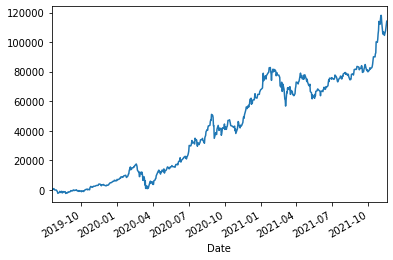

In [21]:
r_dff = results
absolute_return_tf = (r_dff['Cumulative_Return'].iloc[-1]-capital)/capital
CAGR_tf = ((r_dff['Cumulative_Return'].iloc[-1]/capital)**(252/len(dff)))-1
information_ratio_tf = (r_dff.Cumulative_Return.pct_change().mean()/r_dff.Cumulative_Return.pct_change().std())*((252) **0.5)

print(f"Absolute_return of our portfolio :{np.round(absolute_return_tf,2)*100}%")
print(f"CAGR of our portfolio : {np.round(CAGR_tf,2)*100}%")
print(f"information_ratio of our portfolio :{np.round(information_ratio_tf,4)}")
r_dff.Cumulative_Return.plot()

In [15]:
short_time = 5
long_time = 15
my_porto['Close_Short_Rolling'] = my_porto['My_Fund_Close'].rolling(window = short_time).mean() 
my_porto['Close_Long_Rolling'] = my_porto['My_Fund_Close'].rolling(window = long_time).mean()
my_porto = my_porto.dropna()
my_porto

,My_Fund_Open,My_Fund_Close,Close_Short_Rolling,Close_Long_Rolling
Date,,,,
2014-01-22,10313.821659,10287.543759,10206.350316,9951.994412
2014-01-23,10238.095736,10312.103010,10239.174347,9972.801279
2014-01-24,10289.865310,10122.160593,10223.506969,9985.258564
2014-01-27,10157.092367,9972.517662,10193.587547,9992.810097
2014-01-28,9854.616104,9989.225019,10136.710009,10008.422040
2014-01-29,9904.378444,9894.129157,10058.027088,10013.454598
2014-01-30,10013.776369,10102.531678,10016.112822,10030.505063
2014-01-31,9839.317202,9921.087532,9975.898210,10041.707272
2014-02-03,9919.151496,9724.848043,9926.364286,10041.056427


In [25]:
X = my_porto.copy()
y = np.where(X.My_Fund_Close.shift(-1) >= X.My_Fund_Close, 1, -1) 
index = int(0.7*len(X)) 
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train, y_train)
print(metrics.confusion_matrix(y_test, predictions))
print(logistic.score(X_test, y_test))
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

[[  0 244]
 [  0 349]]
0.5885328836424958


,0,1
0,My_Fund_Open,[7.256071516066758e-05]
1,My_Fund_Close,[-2.8733110982787716e-05]
2,Close_Short_Rolling,[-0.00016167734386993992]
3,Close_Long_Rolling,[0.00013131486359894867]


In [17]:
results = X_test.copy()
results['c2c_price'] = X_test.My_Fund_Close.shift(-1) - X_test.My_Fund_Close 
results['Predictions'] = predictions 
results['True_Label'] = y_test  
results['Daily_Return'] = results['c2c_price']*results['Predictions'] 
results['Cumulative_Return'] = results['Daily_Return'].cumsum() 
results.dropna(inplace = True)
results 

,My_Fund_Open,My_Fund_Close,Close_Short_Rolling,Close_Long_Rolling,c2c_price,Predictions,True_Label,Daily_Return,Cumulative_Return
Date,,,,,,,,,
2019-07-18,30915.274826,31164.860581,31119.216317,30515.626632,-112.055191,1,-1,-112.055191,-112.055191
2019-07-19,31482.432629,31052.805390,31108.918581,30604.165232,615.253777,1,1,615.253777,503.198586
2019-07-22,31333.085166,31668.059167,31184.933076,30738.777824,224.469653,1,1,224.469653,727.668239
2019-07-23,31825.577015,31892.528820,31349.055373,30857.541689,292.090820,1,1,292.090820,1019.759059
2019-07-24,31698.330350,32184.619640,31592.574719,30996.569705,-833.616467,1,-1,-833.616467,186.142592
2019-07-25,31710.842748,31351.003173,31629.803238,31063.274773,-94.288128,1,-1,-94.288128,91.854464
2019-07-26,31195.179818,31256.715045,31670.585169,31130.910849,-26.773248,1,-1,-26.773248,65.081216
2019-07-29,31173.483061,31229.941797,31582.961695,31207.419447,-35.549764,1,-1,-35.549764,29.531453
2019-07-30,30945.268182,31194.392034,31443.334338,31265.607325,-433.537218,1,-1,-433.537218,-404.005765


Absolute_return of our portfolio :-80.0%
CAGR of our portfolio : -14.000000000000002%
information_ratio of our portfolio :-0.1356


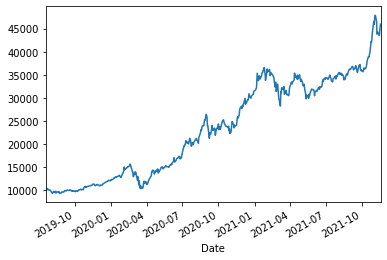

In [27]:
r_dff = results
absolute_return_bh = (r_dff.My_Fund_Close.iloc[-1]-r_dff.My_Fund_Open.iloc[0])/r_dff.My_Fund_Open.iloc[0]
CAGR_bh = ((r_dff.My_Fund_Close.iloc[-1]/r_dff.My_Fund_Open.iloc[0])**(252/len(dff)))-1
information_ratio_bh = (r_dff.My_Fund_Close.pct_change().mean()/r_dff.My_Fund_Close.pct_change().std())*((252) **0.5)
print(f"Absolute_return of our portfolio :{np.round(absolute_return_tf,2)*100}%")
print(f"CAGR of our portfolio : {np.round(CAGR_tf,2)*100}%")
print(f"information_ratio of our portfolio :{np.round(information_ratio_tf,4)}")
((r_dff.My_Fund_Close.pct_change().dropna()+1).cumprod()*capital).plot()